<a href="https://colab.research.google.com/github/Creatrohit9/Credit-Card-Default-Prediction-Rohit-Bhadauriya/blob/main/Credit_Card_Default_Prediction(Proponent_Ds)_Rohit_Bhadauriya_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GROUP NAME-PROPONENT_DS**

ROHIT BHADAURIYA

ARUNESH TAMBOLI

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **Importing**

In [ ]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
#print(os.listdir("../input"))

In [ ]:
path='/content/drive/MyDrive/3-capston project supervised machine learning using classification  /Copy of default of credit card clients.xls'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cred_df=pd.read_excel(path, header = 1)

## **Dataset Inspection**

In [ ]:
cred_df.head()

In [ ]:
cred_df.info()

No Null VALUES AND NO CATEGORICAL VARIABLE

In [ ]:
cred_df.shape

In [ ]:
 cred_df.describe(include='all')

# **Thought Process**

1-first see the discret value of column and then assign the categorical value to a perticular value for the better visualization

2-

## **Handling Missing Data**

In [ ]:
# Missing Value Count Function
def show_missing():
    missing = cred_df.columns[cred_df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(cred_df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(cred_df[show_missing()].isnull().sum().sort_values(ascending = False)/len(cred_df)*100,2))

**Depenedent varaible rename**

In [ ]:
#renaming for better convinience
cred_df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)

In [ ]:
# The frequency of defaults
yes = cred_df.IsDefaulter.sum()
no = len(cred_df)-yes

# Percentage
yes_perc = round(yes/len(cred_df)*100, 1)
no_perc = round(no/len(cred_df)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('IsDefaulter',data=cred_df, palette="Greens")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);

In [ ]:
cred_df.head()

In [ ]:
cred_df['IsDefaulter'].value_counts()

"major no........" class imbalance

**Catogerical variable**

In [ ]:
# find categorical variables
categorical = [var for var in cred_df.columns if cred_df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

**Numerical variable**

In [ ]:
# find Numerical variables
numerical = [var for var in cred_df.columns if cred_df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

D**iscrete varaiable**

In [ ]:
discrete = []
for var in numerical:
    if len(cred_df[var].unique())<20:
        print(var, ' values: ', cred_df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

In [ ]:
cred_df['SEX'].value_counts()

 1 = graduate school; 
 
 2 = university; 
 
 3 = high school; 
 
 4 = others

In [ ]:
cred_df['EDUCATION'].value_counts()

In [ ]:
fil = (cred_df['EDUCATION'] == 5) | (cred_df['EDUCATION'] == 6) | (cred_df['EDUCATION'] == 0)
cred_df.loc[fil, 'EDUCATION'] = 4
cred_df['EDUCATION'].value_counts()

In [ ]:
cred_df['MARRIAGE'].value_counts()

we assign the digit to the categories

1-married

2-single

3-other
replace the all the 0 vale catg to other 

In [ ]:
fil = cred_df['MARRIAGE'] == 0
cred_df.loc[fil, 'MARRIAGE'] = 3
cred_df['MARRIAGE'].value_counts()

Let's plot for our categorical variable

In [ ]:
categ_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [ ]:
cred_df_cat = cred_df[categ_features]
cred_df_cat['Defaulter'] = cred_df['IsDefaulter']

In [ ]:
cred_df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
for col in categ_features:
  plt.figure(figsize=(15,8))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  cred_df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)## you can make change in the plot
  sns.countplot(x = col, hue = 'Defaulter', data = cred_df_cat)

we have few observations for categorical features:




*   dataset have more females credit card holder,so number of defaulter have high proportion of females.
*   Number of defaulters have a higher possibility thoat he is educated people  (graduated from  school and university)
*  Number of defaulters have a higher proportion of Singles.

In [ ]:
cred_df['LIMIT_BAL'].max()

In [ ]:
cred_df['LIMIT_BAL'].min()

In [ ]:
cred_df['LIMIT_BAL'].describe()

In [ ]:
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=cred_df)

In [ ]:
cred_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
cred_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
cred_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
cred_df.head()

In [ ]:
cred_df['AGE']=cred_df['AGE'].astype('int')

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(15,8))
age_df=cred_df['AGE'].value_counts().reset_index()
cred_df['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)  # find more intutive plot
sns.barplot(x='index',y='AGE',data=age_df,ax = axes[1],orient='v')

In [ ]:
cred_df.groupby('IsDefaulter')['AGE'].mean()

In [ ]:
cred_df = cred_df.astype('int')

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=cred_df)

**BILL DETAILS**

In [ ]:
bill_df = cred_df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

In [ ]:
sns.pairplot(data=bill_df)

**observation on payment history**

In [ ]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'IsDefaulter', data = cred_df)

**paid payment**

In [ ]:
pay_amnt_df = cred_df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'IsDefaulter']]

need to plot pair plot for all paid payment

In [ ]:
sns.pairplot(data = pay_amnt_df, hue='IsDefaulter')

In [ ]:
plt.figure(figsize=(18,12),edgecolor='k',facecolor='xkcd:light green')
sns.heatmap(cred_df.corr(),annot=True,cmap='YlGnBu',linewidths=.5)

In [ ]:
cred_df.head()

In [ ]:
cred_df.shape


In [ ]:
cred_df['IsDefaulter'].value_counts()

# **Now we need a mandatory action towrds the class Imbalance**
# **So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(cred_df.iloc[:,0:-1], cred_df['IsDefaulter'])

print('Original dataset shape', len(cred_df))
print('Resampled dataset shape', len(y_smote))

In [ ]:
x_smote

In [ ]:
columns = list(cred_df.columns)

In [ ]:
columns.pop()

In [ ]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [ ]:
balance_df['IsDefaulter'] = y_smote

In [ ]:
sns.countplot('IsDefaulter', data = balance_df)

In [ ]:
balance_df[balance_df['IsDefaulter']==1]

# **Now time for Feature Engineering**

In [ ]:
df_cred_fr = balance_df.copy()

In [ ]:
df_cred_fr['Payement_Value'] = df_cred_fr['PAY_SEPT'] + df_cred_fr['PAY_AUG'] + df_cred_fr['PAY_JUL'] + df_cred_fr['PAY_JUN'] + df_cred_fr['PAY_MAY'] + df_cred_fr['PAY_APR']

In [ ]:
df_cred_fr.groupby('IsDefaulter')['Payement_Value'].mean()

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_cred_fr, x = 'IsDefaulter', y = 'Payement_Value' )

In [ ]:
df_cred_fr['Dues'] = (df_cred_fr['BILL_AMT_APR']+df_cred_fr['BILL_AMT_MAY']+df_cred_fr['BILL_AMT_JUN']+df_cred_fr['BILL_AMT_JUL']+df_cred_fr['BILL_AMT_SEPT'])-(df_cred_fr['PAY_AMT_APR']+df_cred_fr['PAY_AMT_MAY']
+df_cred_fr['PAY_AMT_JUN']+df_cred_fr['PAY_AMT_JUL']+df_cred_fr['PAY_AMT_AUG']+df_cred_fr['PAY_AMT_SEPT'])

In [ ]:
df_cred_fr.groupby('IsDefaulter')['Dues'].mean()

In [ ]:
df_cred_fr['EDUCATION'].unique()

In [ ]:
df_cred_fr['EDUCATION']=np.where(df_cred_fr['EDUCATION'] == 6, 4, df_cred_fr['EDUCATION'])
df_cred_fr['EDUCATION']=np.where(df_cred_fr['EDUCATION'] == 0, 4, df_cred_fr['EDUCATION'])

In [ ]:
df_cred_fr['MARRIAGE'].unique()

In [ ]:
df_cred_fr['MARRIAGE']=np.where(df_cred_fr['MARRIAGE'] == 0, 3, df_cred_fr['MARRIAGE'])

In [ ]:
df_cred_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
df_cred_fr.head()

Data is ready for one hot coding

In [ ]:
df_cred_fr = pd.get_dummies(df_cred_fr,columns=['EDUCATION','MARRIAGE'])

In [ ]:
df_cred_fr.head()

In [ ]:
df_cred_fr.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)

In [ ]:
df_cred_fr = pd.get_dummies(df_cred_fr, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [ ]:
df_cred_fr.head()

In [ ]:
# LABEL ENCODING FOR SEX
encoders_nums = {"SEX":{"FEMALE": 0, "MALE": 1}}
df_cred_fr = df_cred_fr.replace(encoders_nums)

In [ ]:
df_cred_fr.head()

In [ ]:
df_cred_fr.drop('ID',axis = 1, inplace = True)

# Data is ready to evaluate our models 

# **Steps**

**Logistic Regression Classifier Algorithm**

LR Classifier Generator 

LR Hyper Parameter Tuning : GridSearch

Final Logistic Regression Training run

**K Nearest Neighbours Classifier Algorithm**

Default Parameters : KNeighborsClassifier

KNN Model Generator Funciton

KNN Hyper Parameter Tuning : GridSearch

Final KNN Training run

**Random Forrests of Decsision Trees**

Default Parameters : RandomForestClassifier

Base Estimator Generator Function

HyperParameter tuning using GridSearchCV

Final Training Run

**Gradient Boosted Trees using XGBoost Library**

XGBoost algorithn training and tuning notes

XGBoost Estimator Instance Generator Function

HyperParameter tuning using BayesSearchCV

Final Training Run for XGBoost

Feature Importance

**Categorical Gradient Boosted Trees using CatBoost Library**

Cleaning Raw Data with Categorical Encoding

CatBoost Estimator Instance Generator Function

Model Evaluation

Final Training Run for CatBoost

Feature Importance

# Implementing Logistic Regression

Logistic Regression is one of the simplest algorithms which estimates the relationship 

1- one dependent binary variable and independent variables 

2-computing the probability of occurrence of an event. 

3-The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C 

4-the power of regulation is reduced and the model increases its complexity, thus overfitting the data.


In [ ]:
df_cred_logreg = df_cred_fr.copy()

In [ ]:
X = df_cred_logreg.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_cred_logreg['IsDefaulter']

In [ ]:
columns = X.columns

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [ ]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

In [ ]:
optimized_clf = grid_lr_clf.best_estimator_

In [ ]:
grid_lr_clf.best_params_

In [ ]:
grid_lr_clf.best_score_

In [ ]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [ ]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

In [ ]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [ ]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

In [ ]:
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

In [ ]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Implementing K-NN 

In [247]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Fit the model
knn.fit(X_train,y_train)

In [ ]:
knn.score(X_test,y_test)

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [ ]:
# Let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

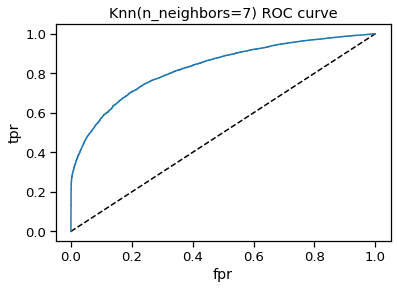

In [248]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [250]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8292452239889754

In [251]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,5)}

In [252]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [253]:
knn_cv.best_score_

0.7541111930529503

In [254]:
knn_cv.best_params_

{'n_neighbors': 4}

# **Implementing the Decision Tree**

Decision Tree is another very popular algorithm for classification problems because it is easy to interpret and understand. An internal node represents a feature, the branch represents a decision rule, and each leaf node represents the outcome. Some advantages of decision trees are that they require less data preprocessing, i.e., no need to normalize features. However, noisy data can be easily overfitted and results in biased results when the data set is imbalanced.

In [ ]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [ ]:
from sklearn.tree import DecisionTreeClassifier  

In [ ]:
X = df_cred_fr.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_cred_fr['IsDefaulter']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
grid_dc_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_dc_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    6.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                       

In [ ]:
grid_dc_clf.best_score_

0.7153670758323152

In [ ]:
optimal_dc_clf = grid_dc_clf.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_dc_clf.predict(X_train)
test_class_preds = optimal_dc_clf.predict(X_test)

In [ ]:
grid_dc_clf.best_params_

{'max_depth': 20, 'min_samples_split': 0.1}

In [ ]:
# Get the accuracy scores
train_accuracy_dc = accuracy_score(train_class_preds,y_train)
test_accuracy_dc = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_dc)
print("The accuracy on test data is ", test_accuracy_dc)

The accuracy on train data is  0.7119174625483119
The accuracy on test data is  0.707736203877829


# **Implementing Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9994250487111509
The accuracy on test data is  0.8328902146423708


In [ ]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8328902146423708
The precision on test data is  0.8002594033722439
The recall on test data is  0.8561121132232552
The f1 on test data is  0.8272440839310854
The roc_score on test data is  0.8343136655719392


We can see from above results that we are getting  around 99% train accuracy and 83% for test accuracy which depicts that model is overfitting. However our f1-score is around 82%, which is not bad.

# Grid search CV for random forest

In [ ]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [ ]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_rf_clf.best_score_

0.8202958484902524

In [ ]:
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [ ]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9985626217778771
The accuracy on test data is  0.8320472083522469


In [ ]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8320472083522469
The precision on test data is  0.7981841763942932
The recall on test data is  0.8561491374513077
The f1 on test data is  0.8261511612296952
The roc_score on test data is  0.8335768157801906


In [ ]:
len(optimal_rf_clf.feature_importances_)

80

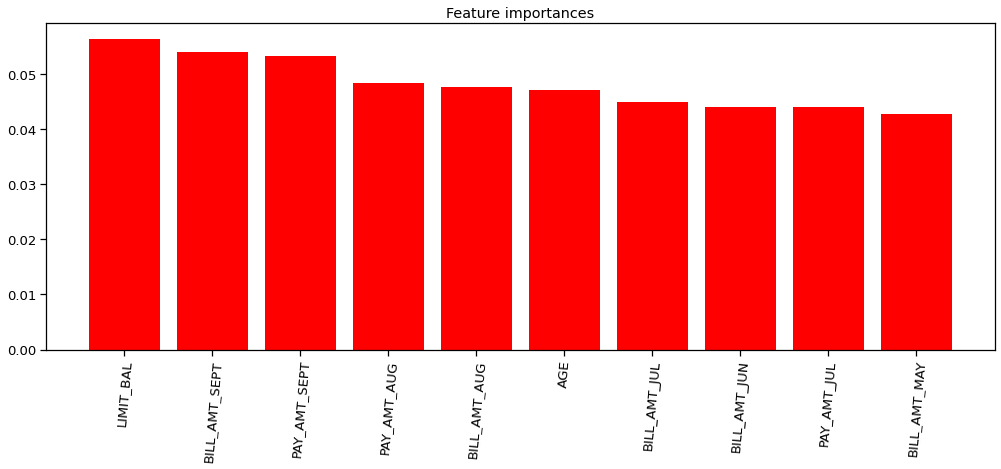

In [ ]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="r",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

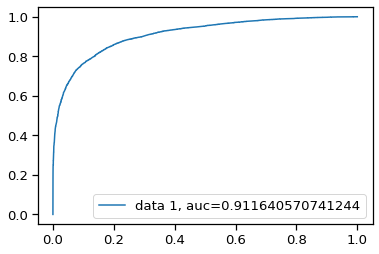

In [ ]:
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

auc score .91%  which is good  models performance

# Implement the XGBoost

In [261]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb

In [262]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [263]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [264]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

In [265]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(seconds=5, microseconds=180782)

In [266]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 
#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest) 

In [267]:
len(train_class_preds_probs)

26167

In [268]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [269]:
test_class_preds_probs[:20]

array([0.28634134, 0.34256408, 0.7805074 , 0.14701997, 0.2717536 ,
       0.82704824, 0.32358554, 0.9546223 , 0.6684135 , 0.86505294,
       0.6835715 , 0.31808788, 0.7958771 , 0.1625772 , 0.43226737,
       0.20344187, 0.77165633, 0.58107114, 0.22877115, 0.34843838],
      dtype=float32)

In [270]:
test_class_preds[:20]

[0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0]

In [271]:
len(y_train)

26167

In [272]:
len(train_class_preds)

26167

In [273]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.7849963694730003
The accuracy on test data is  0.7761295656826029


In [274]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.7761295656826029
The precision on test data is  0.7062256809338522
The recall on test data is  0.8209883523691055
The f1 on test data is  0.7592950896825813
The roc_score on train data is  0.781632595710069


# Grid Search CV

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1,iid=False, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
gsearch1.best_score_